In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 读入训练数据
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

# 标准化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)


In [33]:
theta=np.random.rand(3)

def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]),x,x**2]).T
X=to_matrix(train_z)

def f(x):
    return np.dot(x,theta)

def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [34]:
diff=1
ETA=1e-3
error=E(X,train_y)

while diff>1e-2:
    theta=theta-ETA*np.dot(f(X)-train_y,X)

    current_error=E(X,train_y)
    diff=error-current_error
    error=current_error


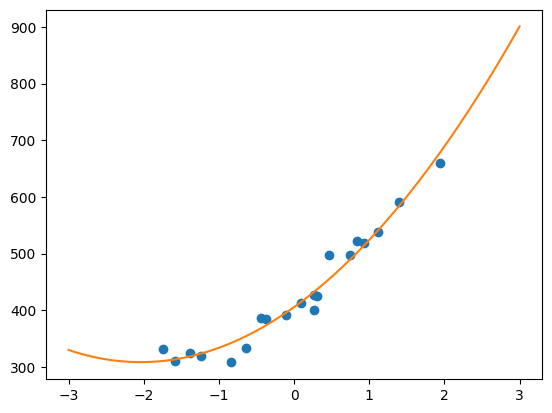

In [35]:
x=np.linspace(-3,3,100)

plt.plot(train_z,train_y,'o')
plt.plot(x,f(to_matrix(x)))
plt.show()

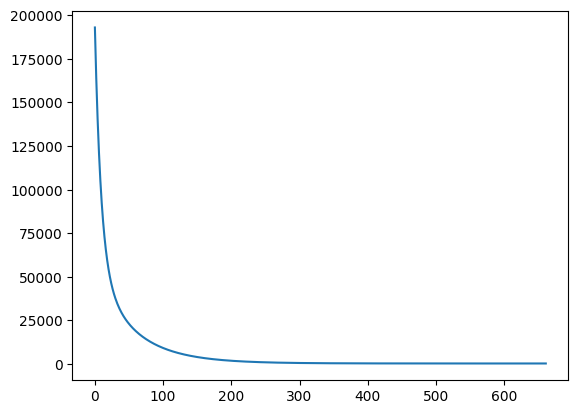

In [36]:
def MSE(x,y):
    return (1/x.shape[0])*np.sum((y-f(x))**2)

theta=np.random.rand(3)

errors=[]

diff=1

errors.append(MSE(X,train_y))

while diff>1e-2:
    theta=theta-ETA*np.dot(f(X)-train_y,X)
    errors.append(MSE(X,train_y))
    diff=errors[-2]-errors[-1]

x=np.arange(len(errors))

plt.plot(x,errors)
plt.show()


In [37]:
theta=np.random.rand(3)
errors=[]
diff=1

errors.append(MSE(X,train_y))

while diff>1e-2:
    p=np.random.permutation(X.shape[0])
    for x,y in zip(X[p,:],train_y[p]):
        theta=theta-ETA*(f(x)-y)*x
    
    errors.append(MSE(X,train_y))
    diff=errors[-2]-errors[-1]

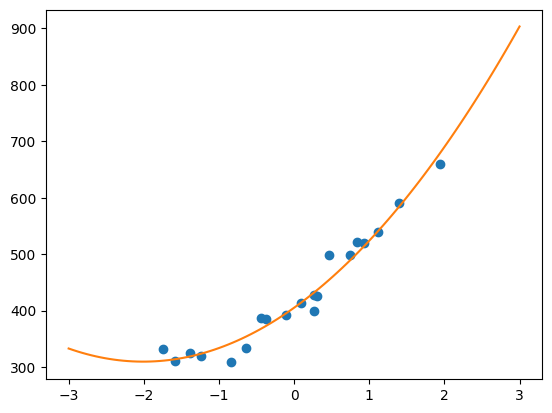

In [40]:
x=np.linspace(-3,3,100)

plt.plot(train_z,train_y,'o')
plt.plot(x,f(to_matrix(x)))
plt.show()